In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# kNN
- 머신러닝 모델 중 가장 직관적이고 간단한 지도학습 모델
- 유사성 척도(즉, 거리함수) 기반 분류 방법
- Euclidean distance 사용
- k는 항상 홀수, 3~10 사이의 값이 최적
- 최대최소정규화 사용

### Iris 데이터에 적용하기

In [2]:
iris = load_iris(as_frame = True)
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
def setcolor(s): #s : Series   #색 지정
    color = []
    colors = ['b', 'g', 'r']
    for i in s.values:
        color.append(colors[i])
    return color

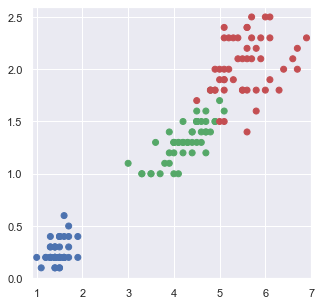

In [4]:
plt.figure(figsize = (5, 5))
plt.scatter(x=df['petal length (cm)'], 
            y=df['petal width (cm)'], 
            color = setcolor(df['target']))

plt.xlim(df['petal length (cm)'].min()-0.1, df['petal length (cm)'].max()+0.1)
plt.ylim(df['petal width (cm)'].min()-0.1, df['petal width (cm)'].max()+0.1)
plt.show()

In [5]:
#Iris 데이터에 적용 : 자료를 정규화(minmax scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = df.iloc[:, :4] #행, 열
scaler.fit(data)
s = scaler.transform(data)

type(s), s.shape

(numpy.ndarray, (150, 4))

In [6]:
sdf = pd.DataFrame(s, columns = df.columns[:-1])
sdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [7]:
#정규화된 데이터 프레임 구성
sdf['target'] = df.target
sdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


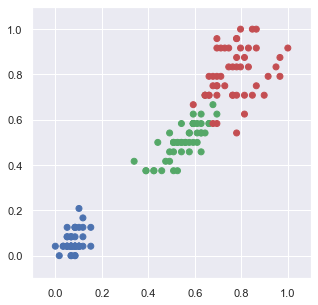

In [8]:
#정규화된 데이터 보기
plt.figure(figsize = (5, 5))
plt.scatter(x=sdf['petal length (cm)'], 
            y=sdf['petal width (cm)'], 
            color = setcolor(sdf['target']))

plt.axis([-0.1, 1.1, -0.1, 1.1]) #x축범위(-0.1~1.1), y축범위(-0.1~1.1)
plt.show()

#### Data를 train과 test로 분리

In [9]:
#자료 분리 및 성능평가 함수
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
X_train, X_test, y_train, y_test = train_test_split(sdf.iloc[:, :-1], #2차원 slicing #Minmax-scaled data
                                                    sdf['target'],  #1차원 slicing
                                                    test_size = 0.33) #training이 67%
type(X_train), X_train.shape, type(y_train), y_train.shape

(pandas.core.frame.DataFrame, (100, 4), pandas.core.series.Series, (100,))

In [11]:
#Iris데이터에 적용
from sklearn.neighbors import KNeighborsClassifier

#k = 5
model = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
model.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [12]:
print(y_test.values)

[2 2 0 2 0 1 2 1 1 2 1 2 2 0 1 0 2 0 0 2 2 0 1 1 1 2 1 1 0 0 1 0 2 1 2 2 0
 1 0 1 1 0 0 0 1 2 1 2 0 0]


In [13]:
pred = model.predict(X_test)
print(pred)

[2 1 0 2 0 1 2 1 1 2 1 2 2 0 1 0 2 0 0 2 2 0 1 1 1 2 1 1 0 0 1 0 2 2 2 2 0
 1 0 1 1 0 0 0 1 2 1 2 0 0]


In [14]:
type(pred), pred.shape

(numpy.ndarray, (50,))

In [15]:
#accruacy 평가하기
print(confusion_matrix(y_test, pred)) #틀린개수 : 2개

[[17  0  0]
 [ 0 16  1]
 [ 0  1 15]]


In [16]:
def dispConfusionMatrix(y_true, y_pred):
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True )
    plt.xlabel('Predicted')
    plt.ylabel('Ground truth')
    plt.show()

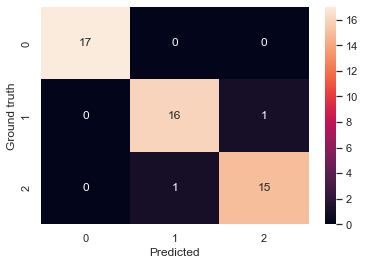

In [17]:
dispConfusionMatrix(y_test, pred)

In [18]:
y_test[y_test != pred]

133    2
72     1
Name: target, dtype: int32

In [19]:
(y_test[y_test != pred]).index

Int64Index([133, 72], dtype='int64')

In [20]:
edf = df.iloc[(y_test[y_test != pred]).index, :]
edf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
133,6.3,2.8,5.1,1.5,2
72,6.3,2.5,4.9,1.5,1


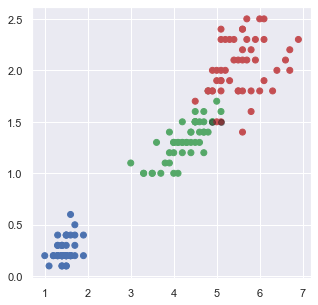

In [21]:
#데이터 & 예측결과 표시하기
plt.figure(figsize = (5, 5))

plt.scatter(x=df['petal length (cm)'], 
            y=df['petal width (cm)'], 
            color = setcolor(df['target']),
            alpha = 1) #불투명

plt.scatter(x=edf['petal length (cm)'], 
            y=edf['petal width (cm)'], 
            color = 'k', #검정색
            alpha = 0.4)

plt.show()

# SVM
- 학습 데이터가 속한 2개의 그룹을 분류하는 선형 분리자를 찾음
- 초평면(hyper plane) : 두 그룹을 나누는 경계선 / 특징의 수보다 한 차원 낮음
- support vector : 경계에서 가장 가까운 각 클래스의 데이터의 점
- margin : 초평면과 써포트 벡터까지의 수직 거리

### SVM 알고리즘
1. H 계산
2. 듀얼 라그랑지안에서 알파값 찾기
3. 기울기 w 계산
4. 서포트 벡터 집합 계산
5. b계산
6. 새로운 데이터에 대한 x_bar에 대한 예측

In [22]:
X = np.array([ [0,0], 
               [1,1] ])
y = [0, 1]

In [23]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X, y)

LinearSVC()

In [24]:
test_data = np.array([[0.7, 0.6],  #t1
                      [0.3, 0.2]]) #t2
pred = model.predict(test_data)
pred

array([1, 0])

In [25]:
#선형 SVM 학습 결과 확인
print(model.coef_)
print(model.intercept_)

[[0.58822994 0.58822994]]
[-0.47057486]


In [26]:
c = model.coef_[0]
i = model.intercept_[0]
w = -c[0] / c[1] #-w1 / w2
b = -i / c[1]
print('기울기:', w, '\ny절편:', b)

기울기: -1.0 
y절편: 0.7999845354335795


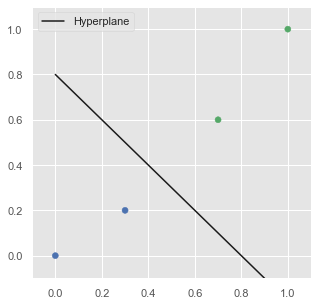

In [27]:
#선형 SVM의 초평면 그려보기
xx = np.linspace(0, 1.5, 50)
yy = w * xx + b

plt.figure(figsize=(5,5))
plt.style.use("ggplot")
plt.plot(xx, yy, 'k-', label='Hyperplane')
plt.scatter(X[:, 0], X[:,1],
           color=setcolor(pd.Series(y)))
plt.scatter(test_data[:, 0], test_data[:, 1],
            color = setcolor(pd.Series(pred)))
plt.legend()
plt.axis([-0.1, 1.1, -0.1, 1.1]) #[xmin, xmax, ymin, ymax]
plt.show()

### XOR 데이터 학습

In [28]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = [0, 1, 1, 0]

In [29]:
from sklearn.svm import SVC
model = SVC()
model.fit(X, y)

SVC()

In [30]:
#새로운 데이터에 대한 예측
test_data = np.array([[0.8, 0.8], #test data
                      [0.2, 0.9],
                      [0.1, 0.3], 
                      [0.5, 0.7],
                      [0.7, 0.5], 
                      [0.5, 0.4],
                      [0.3, 0.3], 
                      [0.7, 0.7]])
pred= model.predict(test_data)
pred

array([0, 1, 0, 1, 1, 1, 0, 0])

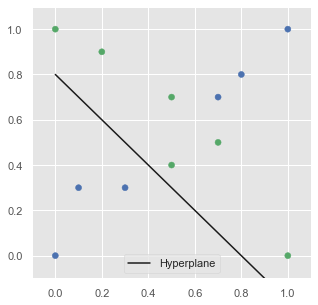

In [31]:
#테스트 결과 시각화
plt.figure(figsize=(5,5))
plt.style.use("ggplot")
plt.plot(xx, yy, 'k-', label='Hyperplane')
plt.scatter(X[:, 0], X[:,1],
           color=setcolor(pd.Series(y)))
plt.scatter(test_data[:, 0], test_data[:, 1],
            color = setcolor(pd.Series(pred)))
plt.legend()
plt.axis([-0.1, 1.1, -0.1, 1.1]) #[xmin, xmax, ymin, ymax]
plt.show()

# Naive Bayes
- 조건부 확률 기반 방법
- 모든 사건을 독립적이라고 가정
#### 1,. 가설
- H1: yes(1)
- H2 : no (2)
#### 2. 사전확률
- H1: P(yes)
- H2: P(no)
#### 3. 가능도
- H1: P(Sunny, Mild, High, True/yes)
- H2: P(Sunny, Mild, High, True/no)

In [32]:
#데이터 읽기
data = pd.read_csv('D:/Ai/weather_play.csv')
data

,outlook,temperature,humidity,windy,play
0,rainy,hot,high,False,no
1,rainy,hot,high,True,no
2,overcast,hot,high,False,yes
3,sunny,mild,high,False,yes
4,sunny,cool,normal,False,yes
5,sunny,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,rainy,mild,high,False,no
8,rainy,cool,normal,False,yes
9,sunny,mild,normal,False,yes


In [33]:
#Category 문자 데이터를 숫자 카테고리로 변환(Map 함수 활용)
# mapping dictionary 만들기
#before : after
outlook_dic = {'overcast': 0, 'rainy': 1, 'sunny': 2}
temperature_dic = {'cool': 0, 'hot': 1, 'mild': 2}
humidity_dic = {'high': 0, 'normal': 1}
windy_dic = {False: 0, True: 1}


# 딕셔너리를 활용해 데이터 매핑
data['outlook'] = data['outlook'].map(outlook_dic)
data['temperature'] = data['temperature'].map(temperature_dic)
data['humidity'] = data['humidity'].map(humidity_dic)
data['windy'] = data['windy'].map(windy_dic)

data

,outlook,temperature,humidity,windy,play
0,1,1,0,0,no
1,1,1,0,1,no
2,0,1,0,0,yes
3,2,2,0,0,yes
4,2,0,1,0,yes
5,2,0,1,1,no
6,0,0,1,1,yes
7,1,2,0,0,no
8,1,0,1,0,yes
9,2,2,1,0,yes


In [34]:
#Multinomial 모델 학습
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(data.iloc[:, :4].values, data['play'].values)

MultinomialNB()

In [35]:
#오늘의 날씨에 대한 예측
#날씨 1에 대한 예측
model.predict([[2, 2, 0, 1]]) #맑고, 온도가 적당하고, 습도가 높고, 바람이 분다.

array(['no'], dtype='<U3')

In [36]:
#계산된 확률
model.predict_proba([[2, 2, 0, 1]]) #결과 : 안온다

array([[0.55477945, 0.44522055]])

In [37]:
model.classes_

array(['no', 'yes'], dtype='<U3')

In [38]:
#날씨 2에 대한 예측
model.predict([[1, 2, 0, 1]]) #비가 오고, 온도가 적당하고, 습도가 높고, 바람이 분다.

array(['yes'], dtype='<U3')

In [39]:
#계산된 확률
model.predict_proba([[1, 2, 0, 1]]) #결과 : 온다

array([[0.48708265, 0.51291735]])

In [40]:
model.classes_

array(['no', 'yes'], dtype='<U3')

## 연속적인 데이터에 대한 나이브 베이지안 분류기

In [41]:
#1. 자료의 준비
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
#2. 데이터를 학습데이터와 테스트 데이터로 분할, 학습
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :4], #2차원 slicing #Minmax-scaled data
                                                    df['target'],  #1차원 slicing
                                                    test_size = 0.33) #training이 67%

In [43]:
#가우시안 모델 인스턴스화
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

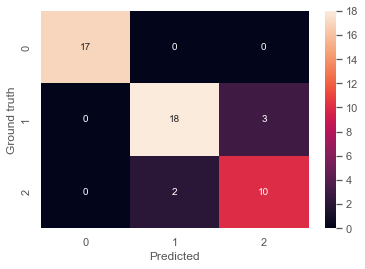

In [44]:
#3. 테스트 데이터로 성능 평가
pred = model.predict(X_test)
dispConfusionMatrix(y_test, pred)

In [45]:
#정확도
print(classification_report(y_test, pred)) #정확도(accuracy) : 0.98 etc...

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.90      0.86      0.88        21
           2       0.77      0.83      0.80        12

    accuracy                           0.90        50
   macro avg       0.89      0.90      0.89        50
weighted avg       0.90      0.90      0.90        50



# Decision Tree(결정 트리)
#### Entropy에 의한 방법
- Shannon의 Entropy : m가지의 상태를 가지는 이산 변수로 구성된 A 영역에 대한 엔트로피
- 엔트로피가 낮을 수록 안정상태, 순도 높음
- 분할에 의해 엔트로피가 낮아짐

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
#결정 트리 분류기 인스턴스 생성 & 학습
#Decision Tree classifier instance 생성
model = DecisionTreeClassifier()
model.fit(data.iloc[:, :4].values, data['play'].values)

DecisionTreeClassifier()

In [52]:
#오늘의 날씨에 대한 예측
#날씨 1에 대한 예측
model.predict([[2, 2, 0, 1]]) #맑고, 온도가 적당하고, 습도가 높고, 바람이 분다.

array(['no'], dtype=object)

In [53]:
#계산된 확률
model.predict_proba([[2, 2, 0, 1]]) #결과 : 안온다

array([[1., 0.]])

In [54]:
model.classes_

array(['no', 'yes'], dtype=object)

In [55]:
#날씨 2에 대한 예측
model.predict([[1, 2, 0, 1]]) #비가 오고, 온도가 적당하고, 습도가 높고, 바람이 분다.

array(['no'], dtype=object)

In [56]:
#계산된 확률
model.predict_proba([[1, 2, 0, 1]]) #결과 : 온다

array([[1., 0.]])

In [57]:
model.classes_

array(['no', 'yes'], dtype=object)

# Random Forest 분류기

In [58]:
from sklearn.datasets import load_digits
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [61]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [ ]:
import warnings
warnings.filterwarning

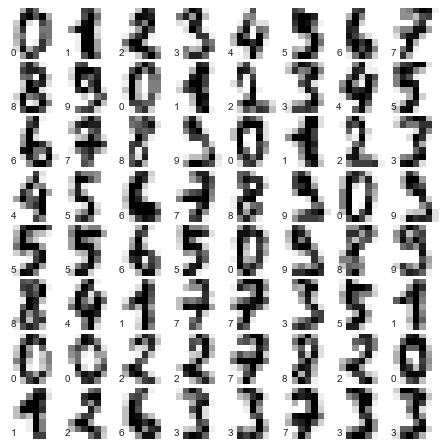

In [62]:
### 자료 : 필기체 숫자 ###
import matplotlib.pyplot as plt #그리기 화면 속성 reset

#그림 설정
fig = plt.figure( figsize=(6,6)) # 그림 크기의 단위는 인치
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# 숫자 출력
for i in range(64):
    ax = fig.add_subplot( 8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, 
              interpolation='nearest')
    # 이미지에 레이블 추가
    ax.text(0,7, str(digits.target[i]))

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [70]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, #x
                                                    digits.target, #y
                                                    random_state = 0)

model = RandomForestClassifier(n_estimators = 1000)
model.fit(X_train, y_train)
pred = model.predict(X_test)

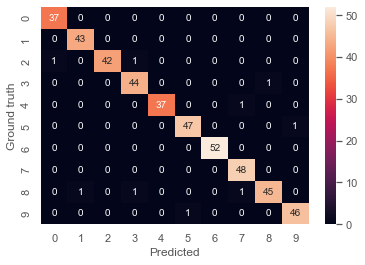

In [65]:
dispConfusionMatrix(y_test, pred)

In [66]:
print(classification_report(y_test, pred)) #accuracy

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.98      1.00      0.99        43
           2       1.00      0.95      0.98        44
           3       0.96      0.98      0.97        45
           4       1.00      0.97      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       0.96      1.00      0.98        48
           8       0.98      0.94      0.96        48
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



# 앙상블 학습 분류기

In [67]:
#분류기 인스턴스화
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [74]:
log_clf = LogisticRegression(fit_intercept = True) #직선의 y절편 존재
knn_clf = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
nb_clf = GaussianNB()

voting_clf = VotingClassifier(
              estimators=[('lr', log_clf), ('nb', nb_clf), ('knn', knn_clf)],
              voting= 'hard') #hard : 다수결의 원칙 사용

rndf_clf = RandomForestClassifier()
svm_clf = SVC()

In [75]:
# 학습 & 정확도 확인
from sklearn.metrics import accuracy_score

clfList = [log_clf, knn_clf, nb_clf, voting_clf, rndf_clf, svm_clf]
for clf in clfList:
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, pred))

C:\Users\ictai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ictai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression 0.9511111111111111
KNeighborsClassifier 0.98
GaussianNB 0.8333333333333334
VotingClassifier 0.9644444444444444
RandomForestClassifier 0.9755555555555555
SVC 0.9911111111111112


### 교차검증
#### cross_val_score(Estimator, X, y) 함수

#### GridSearchCV(Estimator, pram_grid) 함수
- Estimator에 param_grid의 값을 적용하여 성능 평가하여 가장 성능이 우수한 파라미터를 가지는 estimator를 선택함